# Predicting NBA Player Salaries Using Basic and Advanced Statistics

### Author: Markell Jones-Francis [(Github)](https://git.generalassemb.ly/markelljones-francis), [(LinkedIn)](https://www.linkedin.com/in/markell-jones-francis/)

## Problem Statement

NBA Salary negotiations are complicated. They require a multitude of stakeholders, each with their own agendas and interests, coming together to agree on a contract with a set number of years and often a guaranteed salary. Players and agents look to maximize their earnings by signing for the most amount they can, while General Managers will often try to keep numbers manageable so they have room to continue signing more players without exceeding the league-mandated salary cap.  

The issue at the heart of these negotiations is the player's statistical performance. While outside factors such as interpersonal relationships and star power play a role, the statistics that a player is able to record while playing and their ability to help their team matter more than any other factor when negotiating a contract. To streamline this process for players and agents, we will be building a machine learning model using each player's basic, advanced, and team statistics in order to accurately predict their salary. To do this we will be using Linear Regression, Lasso, Ridge, Decision Tree, Random Forest, and Neural Network models and, given the scale of NBA contracts, will be looking to make predictions that are accurate withing \\$250,000 per year, using RMSE as our metric.  

We will be using data from the 2016-17 to the 2018-19 seasons for these projections, because the 2016-17 season saw the NBA salary cap increase to \\$94M, from \\$70M the season before, as a result of the NBA's then newly signed television deal which brought in additional revenue. This cap increase resulted in salary increases across the board for NBA players, so much so that any salaries 2016-17 bear little comparative value when evaluating statistical performance. We are also ending the analysis at the 2018-19 season as that is the most recent completed NBA season.  

With this tool we hope to assist agents find the most fair salaries for the players they represent, and determine which teams are most likely pay their clients the salary that they deserve.

## Executive Summary

## Table of Contents

## Loading Data

### Library Imports

In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error, silhouette_score


RANDOM_STATE = 999


In [238]:
pd.set_option('display.max_columns', None)

### Data Imports

In [239]:
data = pd.read_csv('../Data/nba_data.csv')
df = data.copy()
df.head()

,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,fg2_per_g,fg2a_per_g,fg2_pct,efg_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,season,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ws-dum,ows,dws,ws,ws_per_48,bpm-dum,obpm,dbpm,bpm,vorp,salary,team_PTS,team_FGM,team_FGA,team_3PM,team_3PA,team_FTM,team_FTA,team_REB,team_AST
0,Alex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,0.393,1.4,3.6,0.381,0.6,1.4,0.426,0.531,0.6,0.7,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,2017,1055,10.1,0.560,0.724,0.144,1.9,7.1,4.5,5.5,1.7,0.6,8.3,15.9,0,1.2,0.9,2.1,0.096,0,-1.3,-0.4,-1.6,0.1,5994764,106.6,39.5,87.4,8.4,25.8,19.2,25.8,46.6,21.0
1,Steven Adams,C,23,OKC,80,80,29.9,4.7,8.2,0.571,0.0,0.0,0.000,4.7,8.2,0.572,0.571,2.0,3.2,0.611,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,2017,2389,16.5,0.589,0.002,0.392,13.0,15.4,14.2,5.4,1.8,2.6,16.0,16.2,0,3.3,3.1,6.5,0.130,0,-0.2,0.0,-0.2,1.1,3140517,106.6,39.5,87.4,8.4,25.8,19.2,25.8,46.6,21.0
2,Semaj Christon,PG,24,OKC,64,1,15.2,1.2,3.5,0.345,0.2,1.0,0.190,1.0,2.5,0.406,0.372,0.3,0.5,0.548,0.3,1.1,1.4,2.0,0.4,0.1,0.7,1.2,2.9,2017,973,5.7,0.387,0.283,0.139,2.2,7.8,4.9,18.1,1.4,0.6,15.4,12.2,0,-0.7,0.8,0.1,0.006,0,-4.8,-0.3,-5.1,-0.8,543471,106.6,39.5,87.4,8.4,25.8,19.2,25.8,46.6,21.0
3,Norris Cole,PG,28,OKC,13,0,9.6,1.2,4.0,0.308,0.2,1.0,0.231,1.0,3.0,0.333,0.337,0.6,0.8,0.800,0.0,0.8,0.8,1.1,0.6,0.0,0.5,1.4,3.3,2017,125,5.4,0.381,0.250,0.192,0.0,9.8,4.9,16.3,3.1,0.0,11.0,21.5,0,-0.2,0.2,-0.1,-0.033,0,-7.5,0.8,-6.7,-0.1,288131,106.6,39.5,87.4,8.4,25.8,19.2,25.8,46.6,21.0
4,Nick Collison,PF,36,OKC,20,0,6.4,0.7,1.2,0.609,0.0,0.1,0.000,0.7,1.1,0.636,0.609,0.3,0.4,0.625,0.5,1.1,1.6,0.6,0.1,0.1,0.2,0.9,1.7,2017,128,12.9,0.622,0.043,0.348,7.8,19.1,13.4,13.2,0.8,1.2,13.1,10.1,0,0.3,0.1,0.4,0.145,0,-1.3,1.1,-0.2,0.1,3750000,106.6,39.5,87.4,8.4,25.8,19.2,25.8,46.6,21.0


### Data Dictionary

## Data Cleaning

In [240]:
df.shape

(1651, 63)

The dataset contains 1,835 rows and 54 features.

In [241]:
df.isnull().sum().sum()

0

There are 0 null values in the dataset.

In [242]:
df.dtypes

player       object
pos          object
age           int64
team_id      object
g             int64
             ...   
team_3PA    float64
team_FTM    float64
team_FTA    float64
team_REB    float64
team_AST    float64
Length: 63, dtype: object

All of the features are the correct data type

### Feature Engineering

In [243]:
df['point_share'] = df['pts_per_g'] / df['team_PTS']

Creating `point_share` a custom value for percentage of a team's points per game score by the given player.

In [244]:
df['reb_share'] = df['trb_per_g'] / df['team_REB']

Creating `reb_share` a custom value for percentage of a team's rebounds per game score by the given player.

In [245]:
df['ast_share'] = df['ast_per_g'] / df['team_AST']

Creating `ast_share` a custom value for percentage of a team's assits per game score by the given player.

In [246]:
df['fga_share'] = df['fga_per_g'] / df['team_FGA']

Creating `fga_share` to show the number of shots a player takes per game as a percentage of the number of team shots per game.

In [247]:
df['fg3a_share'] = df['fg3a_per_g'] / df['team_3PA']

Creating `fg3a_hare` to show percentage of a team's 3 point shot attempts come from the given player

In [248]:
df['fta_share'] = df['fta_per_g'] / df['team_FTA']

Creating `fta_share` to show percentage of a team's Free Throw Attempts that come from a given player.

## EDA

In [249]:
df.describe()

,age,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,fg2_per_g,fg2a_per_g,fg2_pct,efg_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,season,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ws-dum,ows,dws,ws,ws_per_48,bpm-dum,obpm,dbpm,bpm,vorp,salary,team_PTS,team_FGM,team_FGA,team_3PM,team_3PA,team_FTM,team_FTA,team_REB,team_AST,point_share,reb_share,ast_share,fga_share,fg3a_share,fta_share
count,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.0,1651.000000,1651.000000,1651.000000,1651.000000,1651.0,1651.000000,1651.000000,1651.000000,1651.000000,1.651000e+03,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000
mean,26.215627,44.358571,21.173834,19.215627,3.054997,6.765112,0.437336,0.808601,2.310902,0.282319,2.247123,4.455724,0.480402,0.494466,1.326348,1.740581,0.692942,0.814173,2.690915,3.501878,1.802907,0.606481,0.377286,1.066202,1.668383,8.241793,2018.041793,1009.658389,12.769473,0.526356,0.344403,0.256305,4.969534,15.287947,10.132829,12.896608,1.521623,1.635918,12.525803,18.565960,0.0,1.112962,1.034101,2.149061,0.072552,0.0,-1.500485,-0.225015,-1.728104,0.523198,6.263335e+06,107.740339,39.900121,86.913265,10.549061,29.515990,17.374985,22.624470,44.051181,23.517262,0.076601,0.079562,0.076877,0.077879,0.078674,0.077070
std,4.186359,27.205299,27.282907,9.262955,2.159835,4.513705,0.120190,0.777945,2.009017,0.164823,1.781956,3.352545,0.140431,0.130299,1.323000,1.633179,0.230349,0.764258,1.875114,2.493172,1.709997,0.429955,0.400165,0.792898,0.793592,5.985455,0.808334,838.885054,7.293676,0.126513,0.226243,0.227628,5.205433,8.208770,5.630416,9.134395,1.178807,1.720187,6.116737,5.864213,0.0,1.871445,1.078588,2.728723,0.113800,0.0,4.409678,2.183730,5.674212,1.254162,7.236640e+06,4.731845,1.735770,2.559858,1.661370,4.540888,1.725628,2.190817,2.065824,2.185109,0.055292,0.056466,0.072689,0.051916,0.067225,0.071017
min,19.000000,1.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,-41.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-2.800000,-0.500000,-1.700000,-1.065000,0.0,-52.400000,-31.100000,-81.400000,-2.000000,2.402200e+04,97.900000,36.200000,79.500000,7.300000,21.000000,12.300000,16.700000,38.600000,18.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,19.000000,0.000000,12.150000,1.500000,3.400000,0.398000,0.100000,0.600000,0.214000,0.950000,2.000000,0.443000,0.463000,0.500000,0.700000,0.648500,0.300000,1.400000,1.800000,0.700000,0.300000,0.100000,0.500000,1.100000,3.900000,2017.000000,225.000000,9.400000,0.497500,0.182000,0.152000,1.800000,10.100000,6.200000,6.800000,1.000000,0.500000,9.300000,14.800000,0.0,0.000000,0.200000,0.200000,0.033500,0.0,-3.200000,-1.100000,-3.500000,-0.100000,1.312611e+06,104.000000,38.700000,85.200000,9.300000,26.100000,16.300000,21.000000,42.800000,22.200000,0.035587,0.040460,0.028846,0.038854,0.021277,0.029915
50%,26.000000,47.000000,6.000000,18.800000,2.600000,5.700000,0.440000,0.600000,1.900000,0.333000,1.800000,3.500000,0.495000,0.507000,0.900000,1.300000,0.753000,0.600000,2.300000,2.900000,1.200000,0.500000,0.3000

**Interpretation:**

In [250]:
# creating dataframe of correlations to salary 

corr_df = df.corr().drop(index = ['salary', 'season'])[['salary']]

In [251]:
highest_corr = corr_df[corr_df['salary'] >= 0.6]
high_corr = corr_df[corr_df['salary'] >= 0.5]
low_corr = corr_df[corr_df['salary'] <= 0.2]
lowest_corr = corr_df[corr_df['salary'] <= 0.1]

pos_corr = corr_df[corr_df['salary'] > 0]
neg_corr = corr_df[corr_df['salary'] < 0]

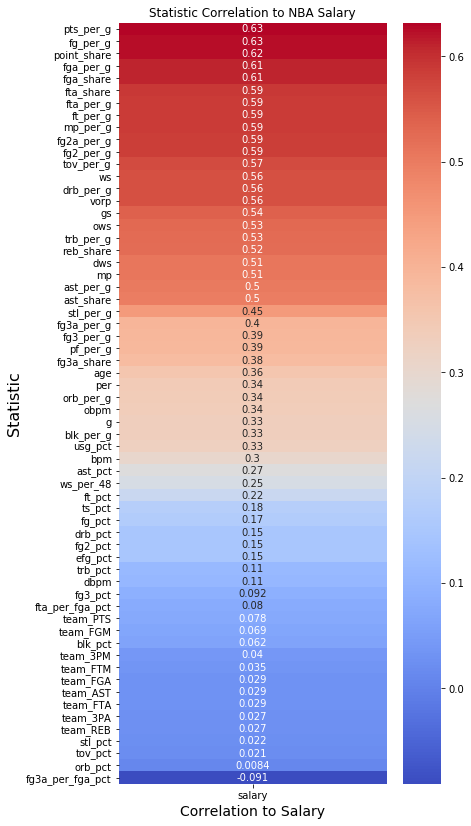

In [252]:
plt.figure(figsize = (6, 14))

sns.heatmap(corr_df.dropna().sort_values(by = 'salary', ascending = False), cmap = 'coolwarm', annot = True)

plt.xlabel('Correlation to Salary', size = 14)
plt.ylabel('Statistic', size = 16)
plt.title('Statistic Correlation to NBA Salary');

**Interpretation:**

In [253]:
df.groupby('season').mean()

,age,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,fg2_per_g,fg2a_per_g,fg2_pct,efg_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ws-dum,ows,dws,ws,ws_per_48,bpm-dum,obpm,dbpm,bpm,vorp,salary,team_PTS,team_FGM,team_FGA,team_3PM,team_3PA,team_FTM,team_FTA,team_REB,team_AST,point_share,reb_share,ast_share,fga_share,fg3a_share,fta_share
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017,26.399209,48.363636,23.126482,19.738735,3.090316,6.851581,0.438445,0.766601,2.174704,0.278227,2.326285,4.675692,0.480065,0.491332,1.404545,1.835968,0.714198,0.840514,2.719960,3.557708,1.790711,0.615415,0.388340,1.096838,1.690711,8.347233,1102.891304,12.820751,0.525508,0.317366,0.271423,4.984190,15.343874,10.173715,12.883992,1.538340,1.664032,12.860672,18.605336,0.0,1.211265,1.130040,2.341897,0.075431,0.0,-1.507115,-0.125099,-1.635178,0.568775,5.910857e+06,105.499605,39.002372,85.386759,9.683992,27.116798,17.804348,23.061462,43.473320,22.657312,0.079211,0.081893,0.079352,0.080272,0.080693,0.079778
2018,26.156140,42.921053,20.391228,18.758421,2.967368,6.569123,0.438867,0.781930,2.220000,0.275958,2.185614,4.351579,0.479961,0.494858,1.249298,1.635088,0.675204,0.766316,2.574912,3.338596,1.753509,0.602105,0.362632,1.061754,1.597368,7.961579,974.489474,12.597368,0.525447,0.339186,0.248209,4.796140,15.149474,9.973684,12.618246,1.560702,1.597895,12.846140,18.523158,0.0,1.075614,0.998947,2.079123,0.068718,0.0,-1.572982,-0.227193,-1.799649,0.504912,6.011548e+06,106.288421,39.564035,86.028070,10.525263,29.136140,16.611930,21.686842,43.490175,23.246842,0.074990,0.076834,0.075554,0.076374,0.076407,0.075538
2019,26.113043,42.259130,20.231304,19.208522,3.110783,6.883304,0.434843,0.872000,2.520870,0.292224,2.238435,4.365391,0.481136,0.496835,1.333913,1.761217,0.691821,0.838435,2.780348,3.614609,1.862609,0.602957,0.382087,1.043652,1.719130,8.426783,962.476522,12.894957,0.528003,0.373369,0.251028,5.128522,15.376000,10.254609,13.183652,1.468174,1.648870,11.913565,18.573739,0.0,1.063478,0.984522,2.048696,0.073821,0.0,-1.422783,-0.310783,-1.738957,0.501217,6.823114e+06,111.151478,41.023304,89.134087,11.333913,32.003826,17.753565,23.169391,45.115826,24.542087,0.075901,0.080214,0.076012,0.077265,0.079145,0.076205


**Interpretation** Team 3 point attempts have increased every year from 27.2 in 2017 to 32.4 in 2019. Total shot attempts have increased from  in 2017 to 89.2 in 2019.  
From 2017 - 2019, `fg3a_per_fga_pct` increased by 6.1%. Part of this is due to players shooting more 3 pointers in 2018-19 than any previous year in NBA history.

Text(0.5, 1.0, 'Average NBA Salary by Season (2017 - 2019)')

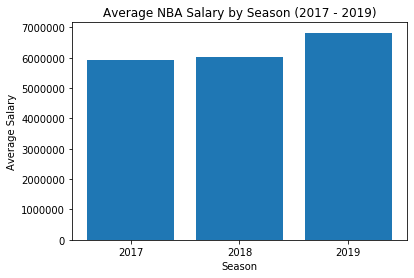

In [254]:
plt.bar(df.groupby('season').mean().index, df.groupby('season')['salary'].mean())

plt.xticks(df.groupby('season').mean().index)
plt.xlabel('Season')
plt.ylabel('Average Salary')
plt.title('Average NBA Salary by Season (2017 - 2019)')

In [255]:
s_17 = df[df['season'] == 2017]
s_18 = df[df['season'] == 2018]
s_19 = df[df['season'] == 2019]

In [256]:
corr_diff = (s_19.corr()[['salary']] - s_17.corr()[['salary']]).dropna().sort_values(by = 'salary', ascending = False)

In [257]:
corr_diff.head(15)

,salary
tov_pct,0.128212
fta_per_fga_pct,0.087109
age,0.080730
stl_per_g,0.049298
fg2_pct,0.044433
dbpm,0.043946
ast_share,0.041193
blk_pct,0.041193
ast_per_g,0.038637
fg3a_share,0.038005


**Interpretation** These are the differrences in the correlation to salary for statistics from the 2017 season to the 2019 season. Positive numbers are more highly correlated while negative numbers are less correlated. The magnitude of the number represents the difference in correlation. 

In [258]:
corr_diff.tail(15)

,salary
fga_share,-0.032081
fg_per_g,-0.032399
ows,-0.047865
dws,-0.050453
fg2_per_g,-0.052096
fg2a_per_g,-0.052625
ws,-0.061716
obpm,-0.066691
gs,-0.074282
bpm,-0.085060


In [259]:
df.sort_values(by = 'point_share', ascending = False).head()

,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,fg2_per_g,fg2a_per_g,fg2_pct,efg_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,season,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ws-dum,ows,dws,ws,ws_per_48,bpm-dum,obpm,dbpm,bpm,vorp,salary,team_PTS,team_FGM,team_FGA,team_3PM,team_3PA,team_FTM,team_FTA,team_REB,team_AST,point_share,reb_share,ast_share,fga_share,fg3a_share,fta_share
1391,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,4.8,13.2,0.368,6.0,11.3,0.528,0.541,9.7,11.0,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,2019,2867,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,0,11.4,3.8,15.2,0.254,0,9.4,1.6,11.0,9.3,30570000,113.9,39.2,87.4,16.1,45.4,19.3,24.4,42.1,21.2,0.316945,0.156770,0.353774,0.280320,0.290749,0.450820
18,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,0.425,2.5,7.2,0.343,7.7,16.8,0.459,0.476,8.8,10.4,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6,2017,2802,30.6,0.554,0.300,0.433,5.4,28.8,17.1,57.3,2.3,0.9,15.9,41.7,0,8.5,4.6,13.1,0.224,0,8.7,2.4,11.1,9.3,26540100,106.6,39.5,87.4,8.4,25.8,19.2,25.8,46.6,21.0,0.296435,0.229614,0.495238,0.274600,0.279070,0.403101
697,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,0.449,3.7,10.0,0.367,5.4,10.1,0.531,0.541,8.7,10.1,0.858,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4,2018,2551,29.8,0.619,0.498,0.502,1.8,15.2,8.6,45.1,2.4,1.7,15.1,36.1,0,11.6,3.8,15.4,0.289,0,8.5,1.4,9.9,7.7,28299399,112.4,38.7,84.2,15.3,42.3,19.6,25.1,43.5,21.5,0.270463,0.124138,0.409302,0.238717,0.236407,0.402390
66,DeMarcus Cousins,C,26,SAC,55,55,34.4,9.2,20.3,0.452,1.7,4.9,0.356,7.5,15.5,0.482,0.494,7.7,10.0,0.770,2.1,8.5,10.6,4.8,1.4,1.3,3.8,3.7,27.8,2017,1891,26.5,0.562,0.239,0.491,7.1,28.3,17.8,27.4,2.0,3.6,13.2,37.5,0,3.4,2.6,6.0,0.153,0,5.6,1.6,7.2,4.4,15756438,102.8,37.9,82.1,9.0,23.9,18.1,23.3,41.1,22.5,0.270428,0.257908,0.213333,0.247259,0.205021,0.429185
87,Anthony Davis,C,23,NOP,75,75,36.1,10.3,20.3,0.505,0.5,1.8,0.299,9.7,18.6,0.524,0.518,6.9,8.6,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0,2017,2708,27.5,0.580,0.088,0.424,6.7,27.9,17.2,11.1,1.7,5.1,9.1,32.6,0,5.9,5.1,11.0,0.195,0,4.4,1.4,5.9,5.4,22116750,104.3,39.1,87.0,9.4,26.8,16.7,22.3,43.7,22.8,0.268456,0.270023,0.092105,0.233333,0.067164,0.385650


**Interpretation:**

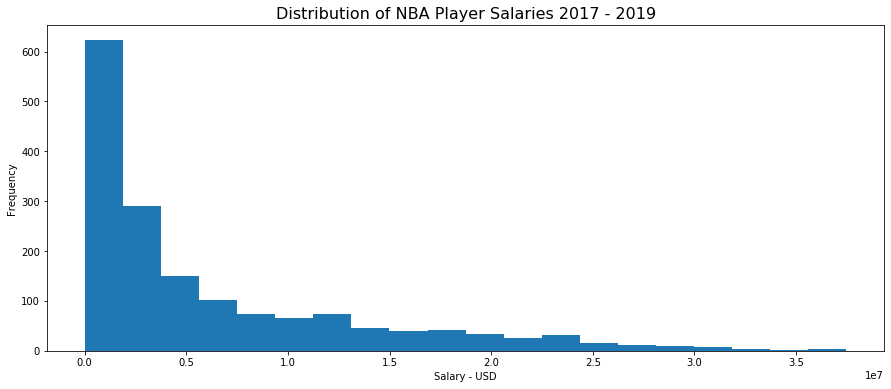

In [260]:
plt.figure(figsize = (15, 6))
plt.hist(df['salary'], bins = 20)

plt.xlabel('Salary - USD')
plt.ylabel('Frequency')
plt.title('Distribution of NBA Player Salaries 2017 - 2019', size = 16);

**Interpretation:**

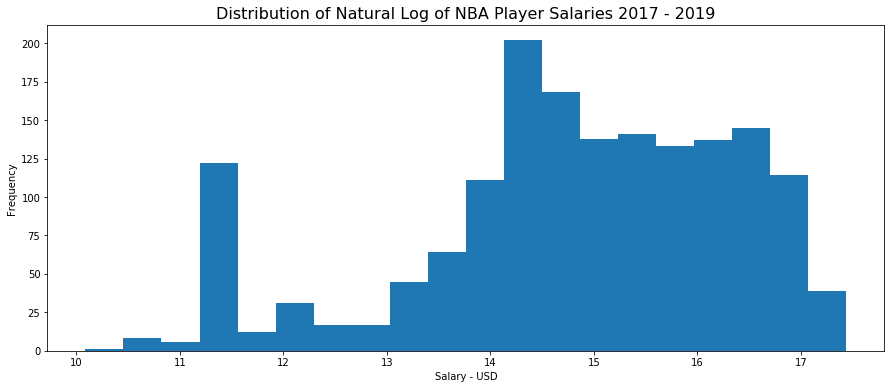

In [261]:
plt.figure(figsize = (15, 6))
plt.hist(np.log(df['salary']), bins = 20)

plt.xlabel('Salary - USD')
plt.ylabel('Frequency')
plt.title('Distribution of Natural Log of NBA Player Salaries 2017 - 2019', size = 16);

**Interpretation**

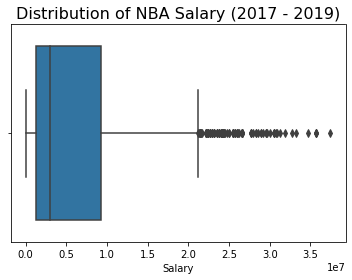

In [262]:
sns.boxplot(df['salary'])

plt.xlabel('Salary')
plt.title('Distribution of NBA Salary (2017 - 2019)', size = 16);

**Interpretation**

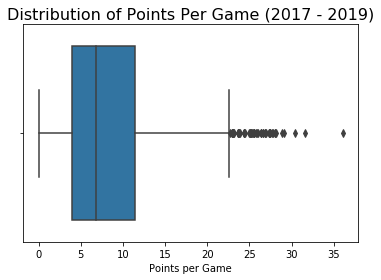

In [263]:
sns.boxplot(df['pts_per_g'])

plt.xlabel('Points per Game')
plt.title('Distribution of Points Per Game (2017 - 2019)', size = 16);

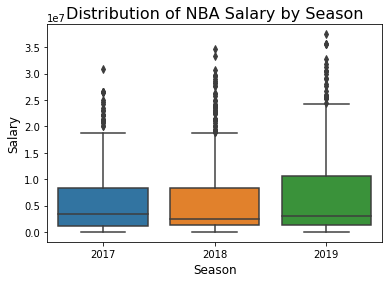

In [264]:
sns.boxplot(df['season'], df['salary'])

plt.xlabel('Season', size = 12)
plt.ylabel('Salary', size = 12)
plt.title('Distribution of NBA Salary by Season', size = 16);

**Interpretaion**  
Salary cap increased from \\$94M in 2016-17 tp to \\$99M in 2017-18 to \\$101M in 2018-19 so players signing contracts in subsequent years will have higher salaries on average than similar players that signed in the years before. 

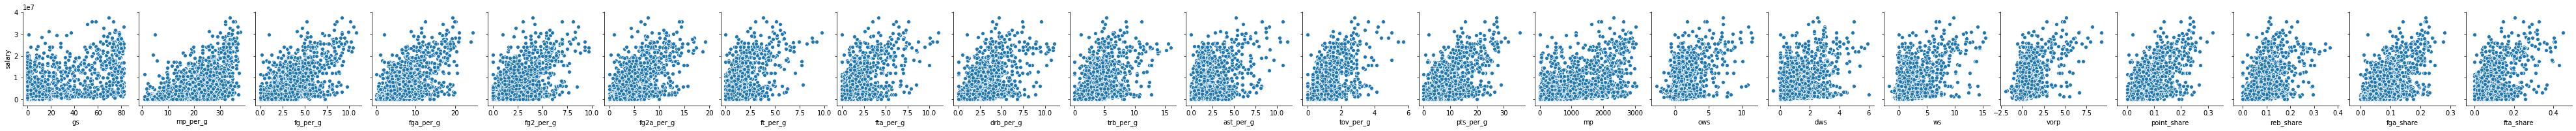

In [265]:
sns.pairplot(df, x_vars = high_corr.index, y_vars = 'salary')

In [266]:
def plot_scatter(x, y = 'salary'):
    
    x_label = ' '.join(x.split('_')).title()
    y_label = y.title()
    title =  f"{' '.join(x.split('_')).title()} vs. {y.title()}"
    
    sns.scatterplot(df[x], df[y])
    
    plt.xlabel(x_label, size = 12)
    plt.ylabel(y_label, size = 12)
    plt.title(title, size = 15);

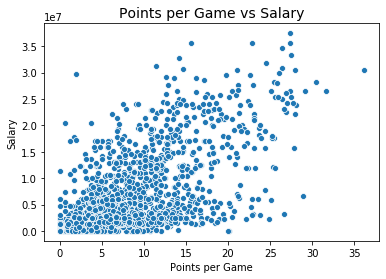

In [267]:
sns.scatterplot(df['pts_per_g'], df['salary'])

plt.xlabel('Points per Game')
plt.ylabel('Salary')
plt.title('Points per Game vs Salary', size = 14);

**Interpretation**

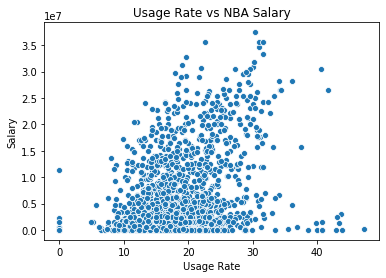

In [268]:
sns.scatterplot(df['usg_pct'], df['salary'])

plt.xlabel('Usage Rate')
plt.ylabel('Salary')
plt.title('Usage Rate vs NBA Salary');

**Interpretation**

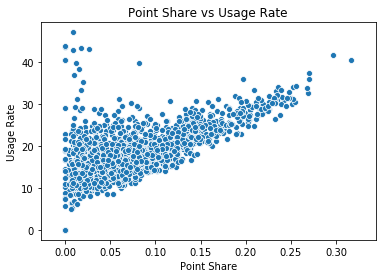

In [269]:
sns.scatterplot(df['point_share'], df['usg_pct'])

plt.xlabel('Point Share')
plt.ylabel('Usage Rate')
plt.title('Point Share vs Usage Rate');

**Interpretation**

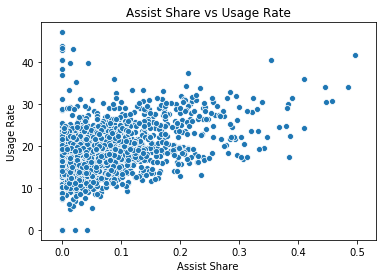

In [270]:
sns.scatterplot(df['ast_share'], df['usg_pct'])

plt.xlabel('Assist Share')
plt.ylabel('Usage Rate')
plt.title('Assist Share vs Usage Rate');

**Interpretation**

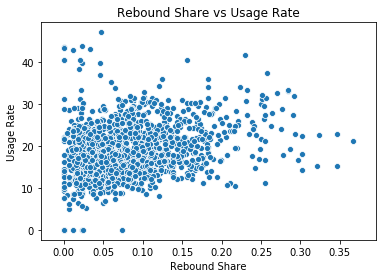

In [271]:
sns.scatterplot(df['reb_share'], df['usg_pct'])

plt.xlabel('Rebound Share')
plt.ylabel('Usage Rate')
plt.title('Rebound Share vs Usage Rate');

**Interpretation**

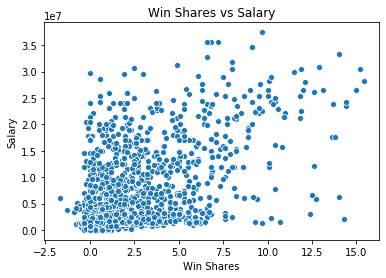

In [272]:
sns.scatterplot(df['ws'], df['salary'])

plt.xlabel('Win Shares')
plt.ylabel('Salary')
plt.title('Win Shares vs Salary');

**Interpretation**

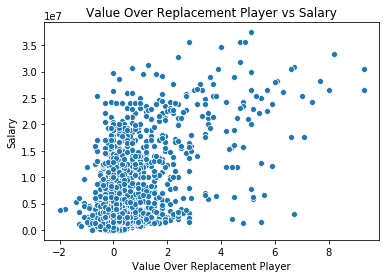

In [273]:
sns.scatterplot(df['vorp'], df['salary'])

plt.xlabel('Value Over Replacement Player')
plt.ylabel('Salary')
plt.title('Value Over Replacement Player vs Salary');

**Interpretation**

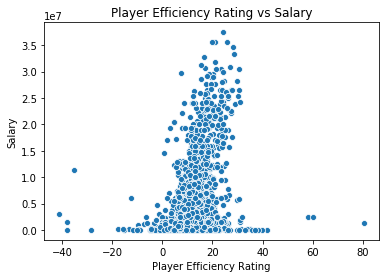

In [274]:
sns.scatterplot(df['per'], df['salary'])

plt.xlabel('Player Efficiency Rating')
plt.ylabel('Salary')
plt.title('Player Efficiency Rating vs Salary');

**Interpretation**

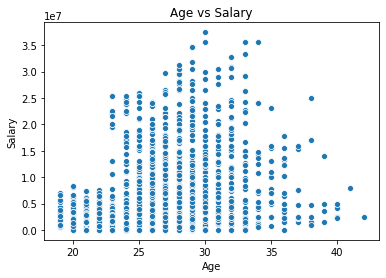

In [275]:
sns.scatterplot(df['age'], df['salary'])

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary');

**Interpretation**

Text(0.5, 1.0, 'Salary by Team Points per Game')

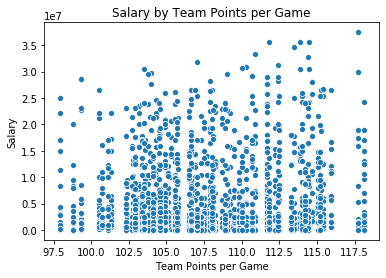

In [276]:
sns.scatterplot(df['team_PTS'], df['salary'])

plt.xlabel('Team Points per Game')
plt.ylabel('Salary')
plt.title('Salary by Team Points per Game')

**Interpretation** Not much of a trend to found overall as each dot on the vertical line represents a player on the team. However it is interesting to compare the peaks of each vertical line. The highest dot on each vertical line represents the highest paid player on each team. When comparing just the peaks, we can observe an upward slope. So, because the NBA prioritizes scoring, it would stand to reason that the highest paid player on teams that score the most points would earn more than players on their lower scoring counterparts.

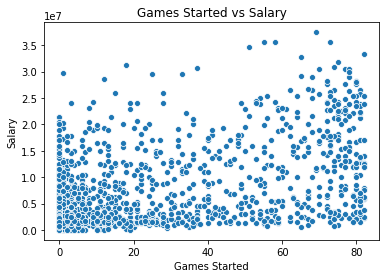

In [277]:
sns.scatterplot(df['gs'], df['salary'])

plt.xlabel('Games Started')
plt.ylabel('Salary')
plt.title('Games Started vs Salary');

**Interpretation**

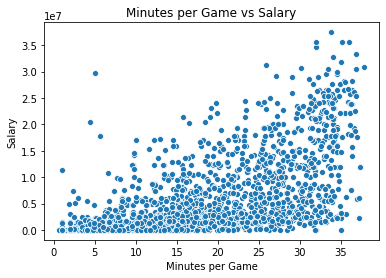

In [278]:
sns.scatterplot(df['mp_per_g'], df['salary'])

plt.xlabel('Minutes per Game')
plt.ylabel('Salary')
plt.title('Minutes per Game vs Salary');

**Interpretation**

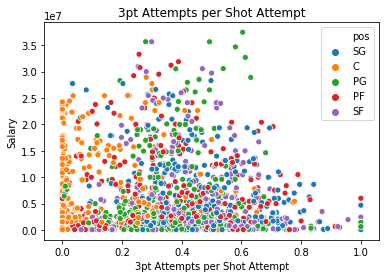

In [279]:
sns.scatterplot(df['fg3a_per_fga_pct'], df['salary'], hue = df['pos'])

plt.xlabel('3pt Attempts per Shot Attempt')
plt.ylabel('Salary')
plt.title('3pt Attempts per Shot Attempt');

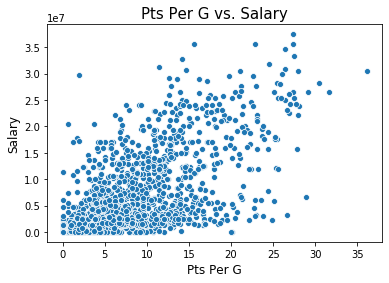

In [280]:
plot_scatter(x ='pts_per_g')

In [281]:
df.sort_values(by = 'fg3a_per_fga_pct', ascending = False).head(10)

,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,fg2_per_g,fg2a_per_g,fg2_pct,efg_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,season,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ws-dum,ows,dws,ws,ws_per_48,bpm-dum,obpm,dbpm,bpm,vorp,salary,team_PTS,team_FGM,team_FGA,team_3PM,team_3PA,team_FTM,team_FTA,team_REB,team_AST,point_share,reb_share,ast_share,fga_share,fg3a_share,fta_share
807,Nicolas Brussino,SF,24,ATL,4,0,2.5,0.0,0.5,0.000,0.0,0.5,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.8,0.8,0.0,0.0,0.0,0.0,0.0,0.0,2018,10,-4.6,0.000,1.0,0.000,0.0,33.5,16.7,0.0,0.0,0.0,0.0,8.7,0,0.0,0.0,0.0,-0.180,0,-8.1,-3.2,-11.3,0.0,393041,103.4,38.2,85.5,11.2,31.0,15.8,20.2,41.9,23.7,0.000000,0.019093,0.000000,0.005848,0.016129,0.000000
583,Anthony Brown,SF,25,MIN,1,0,4.0,1.0,1.0,1.000,1.0,1.0,1.000,0.0,0.0,0.0,1.500,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,2018,4,41.9,1.500,1.0,0.000,0.0,0.0,0.0,41.7,0.0,0.0,0.0,11.1,0,0.0,0.0,0.0,0.571,0,26.2,4.3,30.5,0.0,77250,109.5,41.0,86.1,8.0,22.5,19.4,24.1,42.0,22.7,0.027397,0.000000,0.044053,0.011614,0.044444,0.000000
837,Julyan Stone,SG,29,CHO,23,0,7.6,0.3,0.6,0.462,0.3,0.6,0.462,0.0,0.0,0.0,0.692,0.0,0.1,0.5,0.0,1.2,1.3,1.1,0.2,0.1,0.3,0.9,0.8,2018,175,7.6,0.684,1.0,0.154,0.6,17.6,9.0,19.2,1.1,1.0,33.5,5.2,0,0.2,0.2,0.3,0.087,0,-3.2,1.9,-1.3,0.0,1524305,108.2,39.0,86.7,10.0,27.2,20.2,27.0,45.5,21.6,0.007394,0.028571,0.050926,0.006920,0.022059,0.003704
263,Axel Toupane,SF,24,MIL,2,0,3.0,0.0,0.5,0.000,0.0,0.5,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,2017,6,-9.9,0.000,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.6,0,0.0,0.0,0.0,-0.191,0,-13.2,-5.7,-18.8,0.0,977534,103.6,38.8,81.9,8.8,23.7,17.2,22.4,40.4,24.2,0.000000,0.000000,0.000000,0.006105,0.021097,0.000000
920,Chris Boucher,PF,25,GSW,1,0,1.0,0.0,1.0,0.000,0.0,1.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,1,-28.5,0.000,1.0,0.000,0.0,100.0,55.9,0.0,0.0,0.0,0.0,43.9,0,0.0,0.0,0.0,-0.899,0,-21.7,-11.4,-33.1,0.0,77250,113.5,42.8,85.1,11.3,28.9,16.6,20.3,43.5,29.3,0.000000,0.022989,0.000000,0.011751,0.034602,0.000000
769,Jarell Eddie,SF,26,CHI,1,0,3.0,0.0,1.0,0.000,0.0,1.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,3,-13.5,0.000,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5,0,0.0,0.0,0.0,-0.373,0,-13.3,-8.8,-22.1,0.0,166256,102.9,38.7,88.8,11.0,31.1,14.6,19.2,44.7,23.5,0.000000,0.000000,0.000000,0.011261,0.032154,0.000000
753,Nigel Hayes,SF,23,TOR,2,0,3.0,1.0,1.0,1.000,1.0,1.0,1.000,0.0,0.0,0.0,1.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,3.0,2018,6,34.9,1.500,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,33.3,21.9,0,0.0,0.0,0.0,0.018,0,17.4,0.8,18.2,0.0,193532,111.7,41.3,87.4,11.8,33.0,17.3,21.8,44.0,24.3,0.026858,0.000000,0.000000,0.011442,0.030303,0.000000
751,Bruno Caboclo,SF,22,TOR,2,0,3.5,0.0,1.0,0.000,0.0,1.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.0,2018,7,-0.1,0.000,1.0,0.000,0.0,15.7,8.0,16.7,7.0,0.0,0.0,12.5,0,0.0,0.0,0.0,-0.113,0,-8.2,5.7,-2.6,0.0,2451224,111.7,41.3,87.4,11.8,33.0,17.3,21.8,44.0,24.3,0.000000,0.011364,0.020576,0.011442,0.030303,0.000000
1002,Reggie Hearn,SG,26,DET,3,0,2.3,0.3,0.7,0.500,0.3,0.7,0.500,0.0,0.0,0.0,0.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018,7,13.1,0.750,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.7,0,0.0,0.0,0.0,0.132,0,2.9,-1.4,1.5,0.0,77250,103.8,39.1,86.9,10.8,28.9,14.7,19.8,43.7,22.8,0.009634,0.000000,0.000000,0.008055,0.024221,0.000000
1030,David Stockton,PG,26,UTA,3,0,3.0,0.7,1.0,0.667,0.7,1.0,0.667,0.0,0.0,0.0,1.000,1.3,1.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,1.0,3.3,2018,9,33.9,1.050,1.0,1.333,0.0,0.0,0.0,0.0,0.0,0.0,17.4,28.8,0,0.1,0.0,0.1,0.459,0,6.7,1.1,7.9,0.0,192812,104.1,38.3,82.9,10.8,29.6,16.8,21.5,43.3,22.4,0.031700,0.000000,0.000000,0.012063,0.033784,0.060465


**Interpretation**

In [282]:
top_25 = df.sort_values(by = 'salary', ascending = False).head(25)

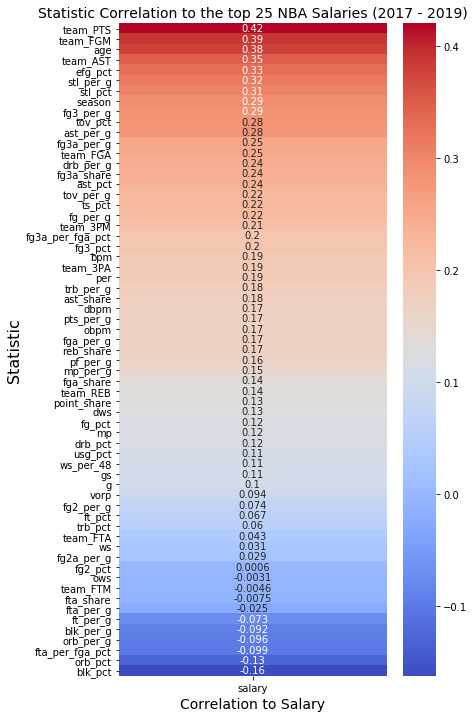

In [283]:
plt.figure(figsize = (6, 12))

sns.heatmap(top_25.corr()[['salary']].sort_values(by = 'salary', ascending = False).drop(index = 'salary').dropna(), 
            cmap = 'coolwarm', annot = True)

plt.xlabel('Correlation to Salary', size = 14)
plt.ylabel('Statistic', size = 16)
plt.title('Statistic Correlation to the top 25 NBA Salaries (2017 - 2019)', size = 14);

**Interpretation** Because these are only among the top 20 salaries, the higher correlations do not reflect the trends of the league as a whole but only among those at the top of the pay scale. Therefore, statistics with the higher correlation here serve only as seperators among the league's top earners, while lower correlations are statistics where they are relatively similar. 

In [284]:
df.groupby('pos')['player'].count().sort_values(ascending = False)

pos
SG    389
PF    347
PG    327
C     317
SF    271
Name: player, dtype: int64

In [285]:
df.groupby('pos').mean().sort_values(by = 'salary', ascending = False)

,age,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,fg2_per_g,fg2a_per_g,fg2_pct,efg_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,season,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ws-dum,ows,dws,ws,ws_per_48,bpm-dum,obpm,dbpm,bpm,vorp,salary,team_PTS,team_FGM,team_FGA,team_3PM,team_3PA,team_FTM,team_FTA,team_REB,team_AST,point_share,reb_share,ast_share,fga_share,fg3a_share,fta_share
pos,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C,26.552050,48.760252,24.104101,18.004101,3.185174,6.022397,0.523842,0.259306,0.769085,0.157849,2.923028,5.255836,0.546022,0.541095,1.459306,2.078549,0.656549,1.664038,3.862145,5.524606,1.253312,0.499685,0.751420,1.074448,2.029653,8.085804,2018.018927,1024.044164,16.649527,0.569394,0.111044,0.362688,10.605994,22.264984,16.444479,10.088644,1.414826,3.453943,13.753943,18.402839,0.0,1.788644,1.429022,3.220820,0.128830,0.0,-0.835016,0.389905,-0.448265,0.829338,7.910419e+06,108.096530,40.051735,86.916404,10.583281,29.495268,17.395899,22.606940,44.112303,23.748896,0.075033,0.125407,0.052683,0.069324,0.025808,0.091504
SF,26.627306,43.749077,23.258303,20.277860,2.971218,6.779705,0.416775,0.949077,2.731365,0.316720,2.022140,4.049815,0.470432,0.488657,1.275277,1.646125,0.677317,0.630996,2.617712,3.246125,1.483026,0.695203,0.318819,0.932103,1.583026,8.172694,2018.018450,1049.667897,11.060148,0.518483,0.438133,0.214487,3.435424,13.625830,8.534317,9.823985,1.615129,1.204428,10.826568,17.261993,0.0,0.950923,1.044649,1.997048,0.055996,0.0,-1.746494,-0.225830,-1.976015,0.466421,6.246967e+06,107.721402,39.915129,86.888561,10.538745,29.486347,17.339114,22.629151,44.031734,23.565683,0.075918,0.073800,0.062682,0.078134,0.093892,0.072471
PF,25.985591,42.953890,19.553314,18.233718,2.915274,6.372046,0.438455,0.755908,2.171758,0.285919,2.161383,4.205187,0.492000,0.494360,1.188761,1.595677,0.675833,0.978098,3.122767,4.094813,1.198847,0.492507,0.423343,0.926225,1.690202,7.769164,2018.017291,944.123919,12.914121,0.524317,0.345130,0.253741,6.410375,19.136888,12.778098,8.823055,1.356484,1.987320,11.792795,18.504899,0.0,0.967435,1.015850,1.987608,0.074582,0.0,-1.474352,-0.328242,-1.804899,0.431988,6.116328e+06,107.545821,39.823343,86.877522,10.502305,29.417003,17.374928,22.636599,44.039193,23.413833,0.072295,0.093020,0.050743,0.073330,0.074050,0.071280
PG,26.229358,42.440367,20.834862,19.776453,3.142813,7.369419,0.411630,0.912844,2.623547,0.317838,2.233333,4.743731,0.451584,0.471511,1.551070,1.927829,0.731141,0.433028,1.981040,2.415902,3.336086,0.726911,0.202141,1.401223,1.577064,8.743425,2018.042813,1005.391437,12.817431,0.510691,0.360850,0.247627,2.428440,10.670336,6.544037,23.481040,1.737920,0.798777,14.630581,20.110092,0.0,1.176758,0.906116,2.080734,0.063538,0.0,-1.407951,-0.346483,-1.753823,0.650765,5.914723e+06,107.656269,39.830887,86.826911,10.561774,29.599388,17.418960,22.617737,43.970336,23.387768,0.081316,0.054883,0.143516,0.084888,0.088893,0.085106
SG,25.848329,44.061697,19.064267,19.867352,3.058098,7.202828,0.401776,1.117738,3.135733,0.326715,1.941131,4.067866,0.447753,0.479905,1.187404,1.502828,0.716635,0.423393,1.998972,2.415681,1.723650,0.632134,0.219280,0.996144,1.490746,8.416967,2018.097686,1032.107969,10.629049,0.511756,0.454799,0.208329,2.295887,11.208483,6.760154,12.061697,1.508997,0.845244,11.593316,18.363753,0.0,0.751414,0.828792,1.583033,0.043992,0.0,-1.972494,-0.531362,-2.508226,0.287404,5.356698e+06,107.707455,39.892802,87.032391,10.559383,29.571722,17.346015,22.630334,44.093573,23.495887,0.078231,0.054956,0.073778,0.082838,0.106689,0.066921


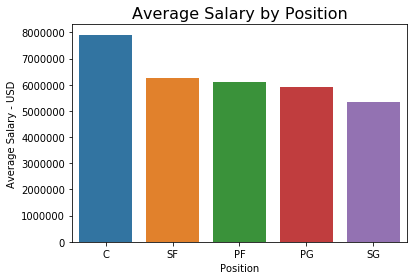

In [286]:
sns.barplot(x = df.groupby('pos').mean().sort_values(by = 'salary', ascending = False).index, 
            y = df.groupby('pos').mean().sort_values(by = 'salary', ascending = False)['salary'])

plt.xlabel('Position')
plt.ylabel('Average Salary - USD')
plt.title('Average Salary by Position', size = 16);

In [287]:
df.columns

Index(['player', 'pos', 'age', 'team_id', 'g', 'gs', 'mp_per_g', 'fg_per_g',
       'fga_per_g', 'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct',
       'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g',
       'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g',
       'pts_per_g', 'season', 'mp', 'per', 'ts_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ws-dum', 'ows', 'dws',
       'ws', 'ws_per_48', 'bpm-dum', 'obpm', 'dbpm', 'bpm', 'vorp', 'salary',
       'team_PTS', 'team_FGM', 'team_FGA', 'team_3PM', 'team_3PA', 'team_FTM',
       'team_FTA', 'team_REB', 'team_AST', 'point_share', 'reb_share',
       'ast_share', 'fga_share', 'fg3a_share', 'fta_share'],
      dtype='object')

In [288]:
scoring = ['fg_per_g', 'fga_per_g', 'fg_pct', 'fg3_per_g','ts_pct', 'efg_pct', 'fg3a_per_g', 'fg3_pct',
       'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g',
       'fta_per_g', 'ft_pct', 'pts_per_g', 'point_share','fga_share', 'fg3a_share', 'fta_share']

passing = ['ast_per_g', 'ast_pct','tov_per_g','ast_share']

offense = ['fg_per_g', 'fga_per_g', 'fg_pct', 'fg3_per_g','ts_pct', 'efg_pct', 'fg3a_per_g', 'fg3_pct',
       'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g',
       'fta_per_g', 'ft_pct', 'pts_per_g', 'point_share','fga_share', 'fg3a_share', 'fta_share', 
           'ast_per_g', 'ast_pct','tov_per_g','ast_share','tov_pct', 'usg_pct'
          ]

defense = ['drb_per_g','stl_per_g','pf_per_g','drb_pct','dws', 'dbpm']

In [289]:
def plot_salary_scatter(stats = []):
    for stat in stats:
        sns.scatterplot(df[stat], df['salary'])
        
        plt.xlabel(' '.join(stat.split('_')).title())
        plt.ylabel('Salary')
        plt.title(f"{' '.join(stat.split('_')).title()} vs. NBA Salary")

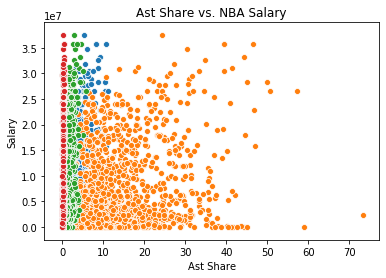

In [290]:
plot_salary_scatter(passing)

**Interpretation**

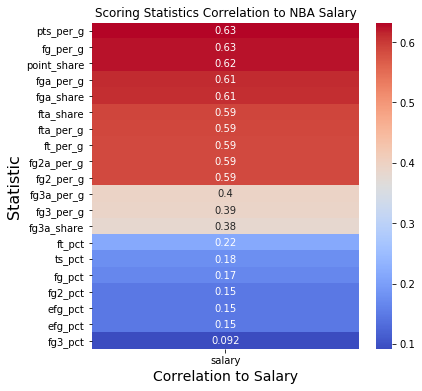

In [291]:
plt.figure(figsize = (6, 6))

sns.heatmap(corr_df.loc[scoring,:].dropna().sort_values(by = 'salary', ascending = False), cmap = 'coolwarm', annot = True)

plt.xlabel('Correlation to Salary', size = 14)
plt.ylabel('Statistic', size = 16)
plt.title('Scoring Statistics Correlation to NBA Salary');

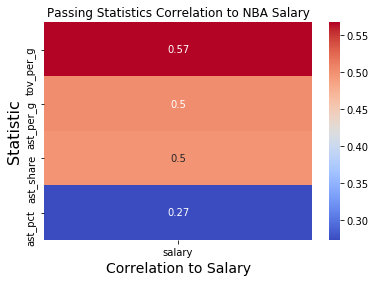

In [292]:
plt.figure(figsize = (6, 4))

sns.heatmap(corr_df.loc[passing,:].dropna().sort_values(by = 'salary', ascending = False), cmap = 'coolwarm', annot = True)

plt.xlabel('Correlation to Salary', size = 14)
plt.ylabel('Statistic', size = 16)
plt.title('Passing Statistics Correlation to NBA Salary');

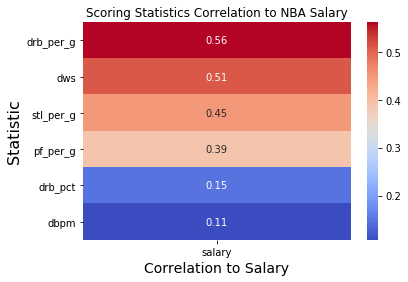

In [293]:
plt.figure(figsize = (6, 4))

sns.heatmap(corr_df.loc[defense,:].dropna().sort_values(by = 'salary', ascending = False), cmap = 'coolwarm', annot = True)

plt.xlabel('Correlation to Salary', size = 14)
plt.ylabel('Statistic', size = 16)
plt.title('Scoring Statistics Correlation to NBA Salary');

In [294]:
pos_corr = pd.get_dummies(df, 
                          columns = ['pos']).corr()[['salary']].tail(5).sort_values(by = 'salary', ascending = False)

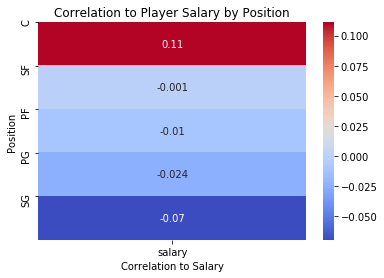

In [295]:
plt.figure(figsize = (6, 4))
sns.heatmap(pos_corr,
            cmap = 'coolwarm',
            annot = True)

plt.xlabel('Correlation to Salary')
plt.ylabel('Position')

plt.yticks(np.arange(5), 
           labels =  [pos[-2::].replace('_', '') for pos in pos_corr.index])

plt.title('Correlation to Player Salary by Position');

In [296]:
team_corr = pd.get_dummies(df, 
                           columns = ['team_id']).corr()[['salary']].tail(30).sort_values(by = 'salary', ascending = False)

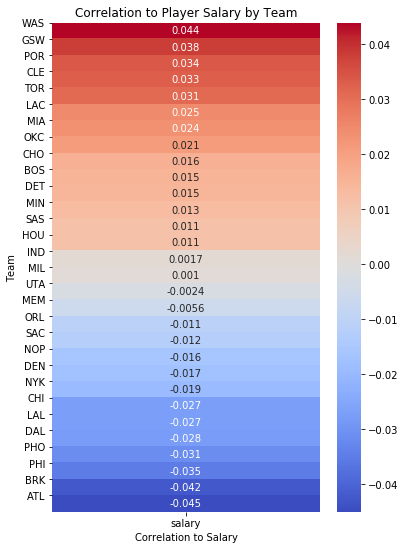

In [297]:
plt.figure(figsize = (6, 9))
sns.heatmap(team_corr,
            cmap = 'coolwarm',
            annot = True)

plt.xlabel('Correlation to Salary')
plt.ylabel('Team')

plt.yticks(np.arange(30), 
           labels =  [team[-3::] for team in team_corr.index])

plt.title('Correlation to Player Salary by Team');

In [298]:
top_5_avg_sal = df.groupby('player').mean().sort_values(by = 'salary', ascending = False).head()

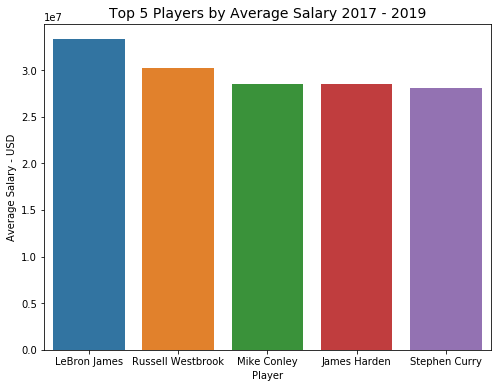

In [299]:
plt.figure(figsize = (8, 6))

sns.barplot(x = top_5_avg_sal.index,
            y = top_5_avg_sal['salary'])

plt.xlabel('Player')
plt.ylabel('Average Salary - USD')

plt.title('Top 5 Players by Average Salary 2017 - 2019', size = 14);

In [765]:
df = pd.get_dummies(df, columns = ['pos', 'team_id'])

In [360]:
df = pd.get_dummies(df, columns = ['pos'])

In [268]:
highest_corr = corr_df[corr_df['salary'] >= 0.6]
high_corr = corr_df[corr_df['salary'] >= 0.5]
low_corr = corr_df[corr_df['salary'] <= 0.2]
lowest_corr = corr_df[corr_df['salary'] <= 0.1]

pos_corr = corr_df[corr_df['salary'] > 0]
neg_corr = corr_df[corr_df['salary'] < 0]

## Modeling

## Baseline Model

### Model Preparation - Baseline Model

In [345]:
X = df.drop(columns = ['salary'])
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

### Modeling - Baseline Model

In [300]:
def get_rmse(model, X, y):
    
    preds = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, preds))
    return round(rmse, 2)

In [347]:
baseline_model = DummyRegressor(strategy = 'mean')

baseline_model.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [348]:
print(f'Train Score:   {baseline_model.score(X_train, y_train)}')
print(f'Test Score:   {baseline_model.score(X_test, y_test)}')

Train Score:   0.0
Test Score:   -0.004202425158959855


In [349]:
print(f'RMSE: {get_rmse(baseline_model, X_test, y_test)}')

RMSE: 7579804.27


On average, the baseline model's predictions are incorrect by $7,579,804.27.

## Linear Regression

### Model Preparation - Linear Regression

In [940]:
df.columns

Index(['player', 'age', 'team_id', 'g', 'gs', 'mp_per_g', 'fg_per_g',
       'fga_per_g', 'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct',
       'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g',
       'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g',
       'pts_per_g', 'season', 'mp', 'per', 'ts_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ws-dum', 'ows', 'dws',
       'ws', 'ws_per_48', 'bpm-dum', 'obpm', 'dbpm', 'bpm', 'vorp', 'salary',
       'team_PTS', 'team_FGM', 'team_FGA', 'team_3PM', 'team_3PA', 'team_FTM',
       'team_FTA', 'team_REB', 'team_AST', 'point_share', 'reb_share',
       'ast_share', 'fga_share', 'pos_C', 'pos_PF', 'pos_PG', 'pos_SF',
       'pos_SG', 'fg3a_share', 'fta_share'],
      dtype='object')

In [91]:
low_corr_cols = ['fg_pct', 'fg3_pct', 'fg2_pct', 'efg_pct', 'ts_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'stl_pct',
       'blk_pct', 'tov_pct', 'dbpm', 'team_PTS', 'team_FGM', 'team_FGA',
       'team_3PM', 'team_3PA', 'team_FTM', 'team_FTA', 'team_REB', 'team_AST', 'salary', 'player', 'pos', 'team_id']

high_corr_cols = ['gs', 'mp_per_g', 'fg_per_g', 'fga_per_g', 'fg2_per_g', 'fg2a_per_g',
       'ft_per_g', 'fta_per_g', 'drb_per_g', 'trb_per_g', 'ast_per_g',
       'tov_per_g', 'pts_per_g', 'mp', 'ows', 'dws', 'ws', 'vorp',
       'point_share', 'reb_share', 'fga_share']

highest_corr_cols = ['fg_per_g', 'fga_per_g', 'pts_per_g', 'point_share', 'fga_share']

basic_cols = ['age', 'g', 'gs', 'mp_per_g', 'fg_per_g',
       'fga_per_g', 'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct',
       'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g',
       'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g',
       'pts_per_g', 'point_share', 'reb_share',
       'ast_share', 'fga_share', 'fg3a_share', 'fta_share']

basic_pos = ['age', 'g', 'gs', 'mp_per_g', 'fg_per_g',
       'fga_per_g', 'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct',
       'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g',
       'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g',
       'pts_per_g', 'point_share', 'reb_share','fg3a_share', 'fta_share',
       'ast_share', 'fga_share', 'pos_C', 'pos_PF', 'pos_PG', 'pos_SF',
       'pos_SG']


advanced_cols = ['mp', 'per', 'ts_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ws-dum', 'ows', 'dws',
       'ws', 'ws_per_48', 'bpm-dum', 'obpm', 'dbpm', 'bpm', 'vorp', 'point_share', 'reb_share',
       'ast_share', 'fga_share', 'fg3a_share', 'fta_share']

advanced_pos = ['mp', 'per', 'ts_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ws-dum', 'ows', 'dws',
       'ws', 'ws_per_48', 'bpm-dum', 'obpm', 'dbpm', 'bpm', 'vorp', 'point_share', 'reb_share',
       'ast_share', 'fga_share', 'fg3a_share', 'fta_share', 'pos_C', 'pos_PF', 'pos_PG', 'pos_SF',
       'pos_SG']

created_cols = ['point_share', 'reb_share',
       'ast_share', 'fga_share', 'fg3a_share', 'fta_share']

In [301]:
X = df[offense]
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

### Modeling - Linear Regression

In [302]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [303]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.45015880246451134
0.4170134822422653


In [304]:
get_rmse(lr, X_test, y_test)

5775327.46

In [305]:
y_preds = lr.predict(X_test)

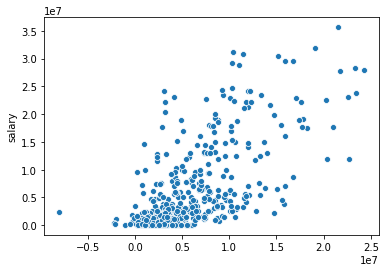

In [306]:
sns.scatterplot(y_preds, y_test);

## Ridge Regression

### Model Preparation - Ridge Regression

In [307]:
X = df.drop(columns = ['player', 'salary', 'team_id', 'pos'])
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

In [308]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Modeling - Ridge Regression

In [79]:
# Creating a list of potential alphas:
r_alphas = np.logspace(1, 5, 200)

# Instantiating our ridge model and cross-validating over our list of ridge alphas:
ridge = RidgeCV(
          alphas = r_alphas,
          scoring= 'r2', 
          cv = 5)

# Fitting our ridge model using best ridge alpha:
ridge.fit(X_train_sc, y_train);

print(f'Best Training Accuracy: {ridge.score(X_train_sc, y_train)}')
print(f'Best Testing Accuracy: {ridge.score(X_test_sc, y_test)}')
print(f'Cross-val-score: {cross_val_score(ridge, X, y).mean()}')

Best Training Accuracy: 0.5709306453371121
Best Testing Accuracy: 0.5996150743248547
Cross-val-score: 0.5434592711818146


In [80]:
get_rmse(ridge, X_train_sc, y_train)

5217042.26

In [81]:
get_rmse(ridge, X_test_sc, y_test)

4769698.58

In [82]:
min(ridge.predict(X_test_sc))

-1633174.320091419

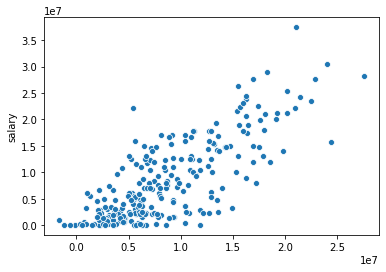

In [83]:
sns.scatterplot(ridge.predict(X_test_sc), y_test)

## Lasso Regression

### Model Preparation - Lasso Regression

In [309]:
X = df[offense]
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

In [310]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Modeling - Lasso Regression

In [311]:
# Creating a list of potential alphas:
l_alphas = np.logspace(1, 3, 50)

# Instantiating our lasso model and cross-validating over our list of Lasso alphas:
lasso = LassoCV(max_iter=75_000,
                alphas = l_alphas,
                cv=5,
                random_state = RANDOM_STATE)

# Fitting our lasso model using best ridge alpha:
lasso.fit(X_train_sc, y_train);

# Scoring 
print(f'Best Training Accuracy: {lasso.score(X_train_sc, y_train)}')
print(f'Best Testing Accuracy: {lasso.score(X_test_sc, y_test)}')
print(f'Cross-val-score: {cross_val_score(lasso, X, y).mean()}')

Best Training Accuracy: 0.4499478606353442
Best Testing Accuracy: 0.4194917706956324
Cross-val-score: 0.41009643672984464


In [312]:
get_rmse(lasso, X_train_sc, y_train)

5278298.58

In [313]:
get_rmse(lasso, X_test_sc, y_test)

5763038.87

## K Nearest Neighbors

### Model Preparation - KNN

In [334]:
X = df[advanced_cols]
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

### Modeling - KNN

In [344]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('mm', MinMaxScaler()),
    ('knn', KNeighborsRegressor())
])

In [345]:
pipe_params = {
    'ss__with_mean'       : [True, False],
    'ss__with_std'        : [True, False],
    'knn__n_neighbors'    : [5,7,9,15,25,33],
    'knn__weights'        : ['uniform', 'distance'],
    'knn__metric'         : ['minkowski', 'euclidean', 'manhattan']
}

In [346]:
gs = GridSearchCV(pipe,
                  param_grid = pipe_params,
                  cv = 3)

knn = gs.fit(X_train_sc, y_train)

print(f'Best Training Score: {knn.score(X_train_sc, y_train)}')
print(f'Best Testing Score: {knn.score(X_test_sc, y_test)}')
print(f'Cross-val-score: {cross_val_score(knn.best_estimator_, X, y).mean()}')

Best Training Score: 0.9983019690474849
Best Testing Score: 0.40367593866301976
Cross-val-score: 0.4318330547107899


In [347]:
knn.best_params_

{'knn__metric': 'minkowski',
 'knn__n_neighbors': 33,
 'knn__weights': 'distance',
 'ss__with_mean': True,
 'ss__with_std': True}

In [348]:
get_rmse(knn, X_train_sc, y_train)

293268.1

In [349]:
get_rmse(knn, X_test_sc, y_test)

5841017.73

## Decision Tree

### Model Preparation - Decision Tree

In [361]:
X = df.drop(columns = ['salary', 'team_id', 'player'])
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

### Modeling - Decision Tree

In [362]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('mm', MinMaxScaler()),
    ('dt', DecisionTreeRegressor(random_state = RANDOM_STATE))
])

In [363]:
pipe_params = {
    'ss__with_mean'         : [True, False],
    'ss__with_std'          : [True, False],
    'dt__max_depth'         : [None, 1, 2, 3, 5, 7, 9,],
    'dt__min_samples_split' : [2, 3, 5 , 9],
    'dt__min_samples_leaf'  : [1, 3, 5],
    'dt__max_features'      : [None, .5],
}

dt = GridSearchCV(pipe, 
                  param_grid = pipe_params,
                  cv = 3)

dt.fit(X_train, y_train)

print(f'Training Score:  {dt.score(X_train, y_train)}')
print(f'Testing Score:  {dt.score(X_test, y_test)}')
print(f'Cross-Val Score:  {cross_val_score(dt, X, y).mean()}')

Training Score:  0.5558166114958372
Testing Score:  0.5132690247845757
Cross-Val Score:  0.4708842427119129


In [364]:
print(f'Train RMSE: {get_rmse(dt, X_train, y_train)}')
print(f'Test RMSE: {get_rmse(dt, X_test, y_test)}')

Train RMSE: 4743219.04
Test RMSE: 5277057.8


## Random Forest

### Model Preparation - Random Forest

In [410]:
X = df.drop(columns = ['salary', 'team_id', 'player'])
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

### Modeling - Random Forest

In [411]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestRegressor(random_state = RANDOM_STATE))
])

In [414]:
pipe_params = {
    'ss__with_mean'         : [True, False],
    'ss__with_std'          : [True, False],
    'rf__n_estimators'      : [50, 100],
    'rf__max_depth'         : [None, 2, 5],
    'rf__min_samples_split' : [2, 3,],
    'rf__min_samples_leaf'  : [1, 3],
    'rf__max_features'      : [None, .25, .5],
    'rf__bootstrap'         : [True, False]
}

rf = GridSearchCV(pipe,
                  param_grid = pipe_params,
                  cv = 3)

rf.fit(X_train, y_train)



GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rf',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                            

In [415]:
print(f'Training Score:  {rf.score(X_train, y_train)}')
print(f'Testing Score:  {rf.score(X_test, y_test)}')
print(f'Cross-Val Score:  {cross_val_score(rf, X, y).mean()}')

Training Score:  0.7333579583370358
Testing Score:  0.6066605919862142


KeyboardInterrupt: 

In [417]:
rf.best_params_

{'rf__bootstrap': True,
 'rf__max_depth': 5,
 'rf__max_features': None,
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 50,
 'ss__with_mean': False,
 'ss__with_std': False}

In [418]:
get_rmse(rf, X_train, y_train)

3674991.49

In [419]:
get_rmse(rf, X_test, y_test)

4743851.53